In [127]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pathlib
import glob


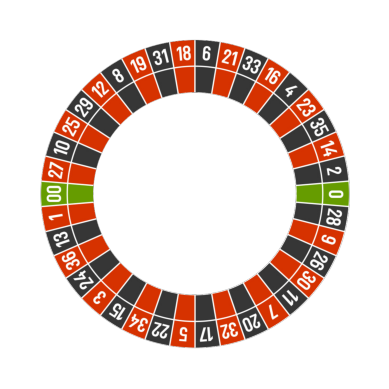

In [128]:
seed_image_dir = pathlib.Path('/data/roulet').with_suffix('')
seed_image_ls = list(seed_image_dir.glob('*.png'))
data_dir = pathlib.Path('/data/roulet/train').with_suffix('')
data_ls = list(data_dir.glob('*.png'))
image_count = len(data_ls)

img = mpimg.imread(seed_image_ls[0])

%matplotlib inline


plt.imshow(img)
plt.axis('off')
plt.show()


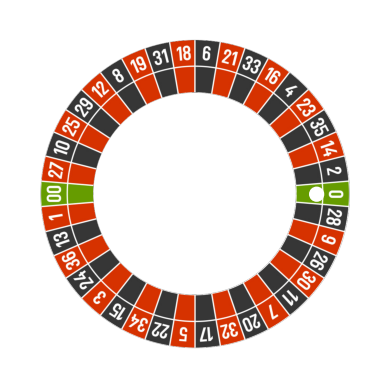

In [129]:
# Draw ball on image
fig, ax = plt.subplots()
ax.imshow(img)

# Define the ball's properties.
ball_center = (830, 500)  # (x, y) coordinates
ball_radius = 15          # radius of the ball

# Create a circle patch - you can set fill to True if you'd like a filled circle.
circle = plt.Circle(ball_center, ball_radius, color='white', fill=True, linewidth=3)
ax.add_patch(circle)

ax.axis('off')
plt.show()

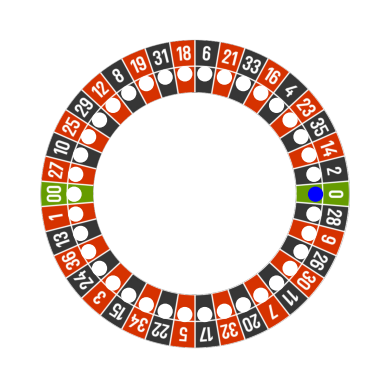

In [130]:
radius = 327
center = (500, 500)
fig, ax = plt.subplots()
ax.imshow(img)
ball_radius = 15          # radius of the ball

points = 38
start = True
for i in range(points):
    index = i
    i = i * 2*np.pi/points
    y = np.sin(i) * radius + center[1]
    x = np.cos(i) * radius + center[0]
    #print(index, i, (int(x),int(y)))
    circle = plt.Circle((x,y), ball_radius, color='blue' if start else 'white', fill=True, linewidth=3)
    ax.add_patch(circle)
    start = False

ax.axis('off')
plt.show()

In [131]:
radius = 327
center = (500, 500)

ball_radius = 15          # radius of the ball

ball_map = {
    0: '0g',
    1: '28b',
    2: '9r',
    3: '26b',
    4: '30r',
    5: '11b',
    6: '7r',
    7: '20b',
    8: '32r',
    9: '17b',
    10: '5r',
    11: '22b',
    12: '34r',
    13: '15b',
    14: '3r',
    15: '24b',
    16: '36r',
    17: '13b',
    18: '1r',
    19: '00g',
    20: '27r',
    21: '10b',
    22: '25r',
    23: '29b',
    24: '12r',
    25: '8b',
    26: '19r',
    27: '31b',
    28: '18r',
    29: '6b',
    30: '21r',
    31: '33b',
    32: '16r',
    33: '4b',
    34: '23r',
    35: '35b',
    36: '14r',
    37: '2b',
}


points = 38
image_dirs = ['/data/roulet/test','/data/roulet/validation','/data/roulet/train']
import os
import cv2

for image_dir in image_dirs:
    if not os.path.exists(image_dir):
        os.mkdir(image_dir)
    for i in range(points):
        index = i
        ball_dir = pathlib.Path(image_dir)
        image = cv2.imread(seed_image_ls[0])

        i = float(i * 2*np.pi/points)
        y = float(np.sin(i) * radius) + center[1]
        x = float(np.cos(i) * radius) + center[0]
        center_point = (int(x),int(y))
        #print(index, i, center_point, center)
        new_image = cv2.circle(image, center_point, ball_radius, (255,255,255) , -1) 
        exists = os.path.exists(f'{image_dir}/{ball_map[index]}')
        if not exists:
            os.mkdir(f"{image_dir}/{ball_map[index]}")
            
        ball_dir = ball_dir.glob(f'{ball_map[index]}/*.png')
        count = len(list(ball_dir))
        cv2.imwrite(f'{image_dir}/{ball_map[index]}/image_{count}.png', new_image)




Found 684 files belonging to 38 classes.
Using 548 files for training.
Found 684 files belonging to 38 classes.
Using 136 files for validation.
['00g', '0g', '10b', '11b', '12r', '13b', '14r', '15b', '16r', '17b', '18r', '19r', '1r', '20b', '21r', '22b', '23r', '24b', '25r', '26b', '27r', '28b', '29b', '2b', '30r', '31b', '32r', '33b', '34r', '35b', '36r', '3r', '4b', '5r', '6b', '7r', '8b', '9r']
(32, 180, 180, 3)
(32,)
0.0 1.0


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,993,542 (15.23 MB)

 Trainable params: 3,993,542 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

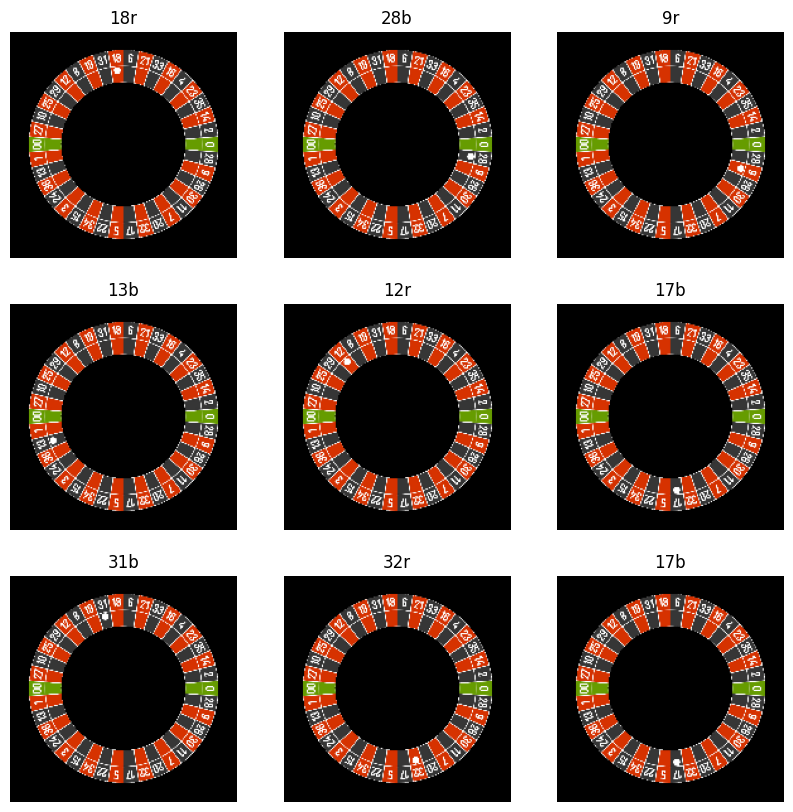

In [132]:

batch_size = 32
img_height = 180
img_width = 180




train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#plt.show()


for image_batch, labels_batch in train_ds:  
    print(image_batch.shape)
    print(labels_batch.shape)
    break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)





model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [140]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/20
 8/18 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - accuracy: 1.0000 - loss: 2.3582e-04

KeyboardInterrupt: 

In [134]:
name = '/data/roulet/models/roulet_model_1.keras'
model.save(name)

In [141]:
name = '/data/roulet/models/roulet_model_1.keras'

model = tf.keras.models.load_model(name)
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,980,628 (45.70 MB)

 Trainable params: 3,993,542 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,987,086 (30.47 MB)

In [ ]:
validation_path = pathlib.Path('/data/roulet/train').with_suffix('')

train_ds = tf.keras.utils.image_dataset_from_directory(
  validation_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

class_names = train_ds.class_names
print(class_names)

#model = tf.keras.models.load_model(name)
model.summary()
prediction_map = {}
print(validation_path)
print([thing for thing in os.listdir(validation_path)])
for food_img_path in [thing for thing in os.listdir(validation_path)]:
    file_list = os.listdir(f"{validation_path}/{food_img_path}")
    for food_file in file_list:
        final_food_img_path = f"{validation_path}/{food_img_path}/{food_file}"
        print(final_food_img_path)
        img = keras.utils.load_img(
            final_food_img_path, target_size=(img_height, img_width)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        file_offset = -1
        if str(food_img_path).split('/')[file_offset] not in prediction_map:
            prediction_map[str(food_img_path).split('/')[file_offset]] = {'count': 0, 'correct': 0}
        if str(food_img_path).split('/')[file_offset] == class_names[np.argmax(score)]:
            prediction_map[str(food_img_path).split('/')[file_offset]]['correct'] += 1
        prediction_map[str(food_img_path).split('/')[file_offset]]['count'] += 1

        scores = {class_name : "{:.2f}%".format(100* np.max(score)) for class_name, score in zip(class_names, score)}

        print(
            "This image {}/{} -> {} @ {:.2f}% confidence."
            .format(str(food_img_path).split('/')[file_offset], str(food_img_path).split('/')[file_offset+1], class_names[np.argmax(score)], 100 * np.max(score))
        )
        for k, v in scores.items():
            if "0.00%" == v:
                continue
            print(f"{k} -> {v}")
        if False:
            img.show()
            input("Press Enter to continue...")



           
for key in prediction_map:
    print(f"{key} -> {prediction_map[key]['correct']} / {prediction_map[key]['count']}")


Found 684 files belonging to 38 classes.
Using 548 files for training.
['00g', '0g', '10b', '11b', '12r', '13b', '14r', '15b', '16r', '17b', '18r', '19r', '1r', '20b', '21r', '22b', '23r', '24b', '25r', '26b', '27r', '28b', '29b', '2b', '30r', '31b', '32r', '33b', '34r', '35b', '36r', '3r', '4b', '5r', '6b', '7r', '8b', '9r']


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,980,628 (45.70 MB)

 Trainable params: 3,993,542 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,987,086 (30.47 MB)

/data/roulet/train
['00g', '25r', '5r', '33b', '28b', '15b', '2b', '18r', '35b', '4b', '3r', '16r', '36r', '27r', '23r', '0g', '12r', '17b', '24b', '32r', '10b', '34r', '9r', '29b', '19r', '8b', '20b', '11b', '31b', '30r', '1r', '7r', '13b', '14r', '22b', '21r', '6b', '26b']
/data/roulet/train/00g/image_12.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
This image 00g/00g -> 00g @ 99.93% confidence.
00g -> 99.93%
15b -> 0.02%
2b -> 0.01%
33b -> 0.01%
4b -> 0.01%
/data/roulet/train/00g/image_8.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
This image 00g/00g -> 00g @ 99.93% confidence.
00g -> 99.93%
15b -> 0.02%
2b -> 0.01%
33b -> 0.01%
4b -> 0.01%
/data/roulet/train/00g/image_7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
This image 00g/00g -> 00g @ 99.93% confidence.
00g -> 99.93%
15b -> 0.02%
2b -> 0.01%
33b -> 0.01%
4b -> 0.01%
/data/roulet/train/00g/image_15.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
This image 00g/00g -> 00g @ 99.93% confidence.
00g -> 99.93%
15b -> 0.02%
2b -> 0.01%
33b -> 0.01